In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
import sklearn
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import random
import warnings
from sklearn.decomposition import PCA


In [25]:
path = r"C:\Users\venablecrofta\OneDrive - Virginia Tech\Desktop\Classes\S25\Project\PHM08\train.csv"
# path =  r"C:\Users\venablecrofta\OneDrive - Virginia Tech\Documents\GitHub\ME_5984-Final-Project\train_FD001.csv"
test_path = r"C:\Users\venablecrofta\OneDrive - Virginia Tech\Desktop\Classes\S25\Project\PHM08\test.csv"
# column_names_1 = ['id', 'cycles', 'setting_1', 'setting_2', 'setting_3']
# column_names_2 = [f"s_{x}" for x in range(1, 22)]
# column_names = column_names_1 + column_names_2


# df_train = pd.read_csv(path, header=None, delimiter=r"\s+")
# df_train.head()

# df_train = df.set_axis(column_names, axis=1)
# df_train.head()
index_names  = ['id', 'cycles']
setting_names  = ['setting_1', 'setting_2', 'setting_3']
sensor_names = [f"s_{x}" for x in range(1, 22)]
col_names = index_names + setting_names + sensor_names

def apply_names (path, column_names):
    df  = pd.read_csv(path, header=None, delimiter =r"\s+", names = column_names)
#     df = df.set_axis(column_names, axis=1)
    return df
df_train = apply_names(path, col_names)
df_test= apply_names(test_path, col_names)

In [26]:
df_train.head()
print(len(df_train['id'].unique()))
df_train.info()

218
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45918 entries, 0 to 45917
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         45918 non-null  int64  
 1   cycles     45918 non-null  int64  
 2   setting_1  45918 non-null  float64
 3   setting_2  45918 non-null  float64
 4   setting_3  45918 non-null  float64
 5   s_1        45918 non-null  float64
 6   s_2        45918 non-null  float64
 7   s_3        45918 non-null  float64
 8   s_4        45918 non-null  float64
 9   s_5        45918 non-null  float64
 10  s_6        45918 non-null  float64
 11  s_7        45918 non-null  float64
 12  s_8        45918 non-null  float64
 13  s_9        45918 non-null  float64
 14  s_10       45918 non-null  float64
 15  s_11       45918 non-null  float64
 16  s_12       45918 non-null  float64
 17  s_13       45918 non-null  float64
 18  s_14       45918 non-null  float64
 19  s_15       45918 non-null  float64
 20  s_

In [23]:
ID_RUL = df_train.groupby(['id'])[["id" ,"cycles"]].max()
ID_RUL.set_index('id', inplace=True)

In [25]:
df_train.head()

,id,cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025


In [29]:
def RUL_calculator(df, df_max_cycles):
    max_cycle = df_max_cycles["cycles"]
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='id', right_index=True)
    result_frame["RUL"] = result_frame["max_cycle"] - result_frame["cycles"] 
    result_frame.drop(['max_cycle'], axis=1, inplace=True)
    return result_frame

df_train = RUL_calculator(df_train, ID_RUL)
df_train.describe()

,id,cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
count,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,...,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000
mean,109.396511,110.307396,24.008881,0.571251,49.172438,472.861677,579.596770,1419.947816,1205.669194,8.029878,...,2334.185381,8065.548831,9.332433,0.023354,348.293915,2228.342654,97.741699,20.776822,12.466282,109.307396
std,62.866193,68.420545,14.793676,0.310935,32.503659,26.460179,37.391068,106.286960,119.550936,3.627125,...,128.426495,84.964099,0.751834,0.004722,27.837602,145.693883,5.378969,9.903697,5.941954,68.420545
min,1.000000,1.000000,0.000000,0.000000,0.000000,445.000000,535.650000,1245.430000,1029.490000,3.910000,...,2027.720000,7851.590000,8.325300,0.020000,303.000000,1915.000000,84.930000,10.230000,6.126600,0.000000
25%,54.000000,53.000000,10.004500,0.250600,20.000000,445.000000,549.580000,1352.910000,1124.010000,3.910000,...,2387.880000,8061.230000,8.676925,0.020000,331.000000,2212.000000,100.000000,10.840000,6.504600,52.000000
50%,110.000000,106.000000,25.001500,0.700000,40.000000,462.540000,555.985000,1369.140000,1138.870000,7.050000,...,2388.070000,8081.475000,9.314500,0.020000,335.000000,2223.000000,100.000000,14.870000,8.925200,105.000000
75%,164.000000,160.000000,41.998100,0.840000,80.000000,491.190000,607.370000,1499.697500,1307.437500,10.520000,...,2388.160000,8126.380000,9.390000,0.030000,369.000000,2324.000000,100.000000,28.470000,17.084200,159.000000
max,218.000000,357.000000,42.008000,0.842000,100.000000,518.670000,644.430000,1614.660000,1442.360000,14.620000,...,2390.740000,8274.880000,11.082600,0.030000,398.000000,2388.000000,100.000000,39.330000,23.590500,356.000000


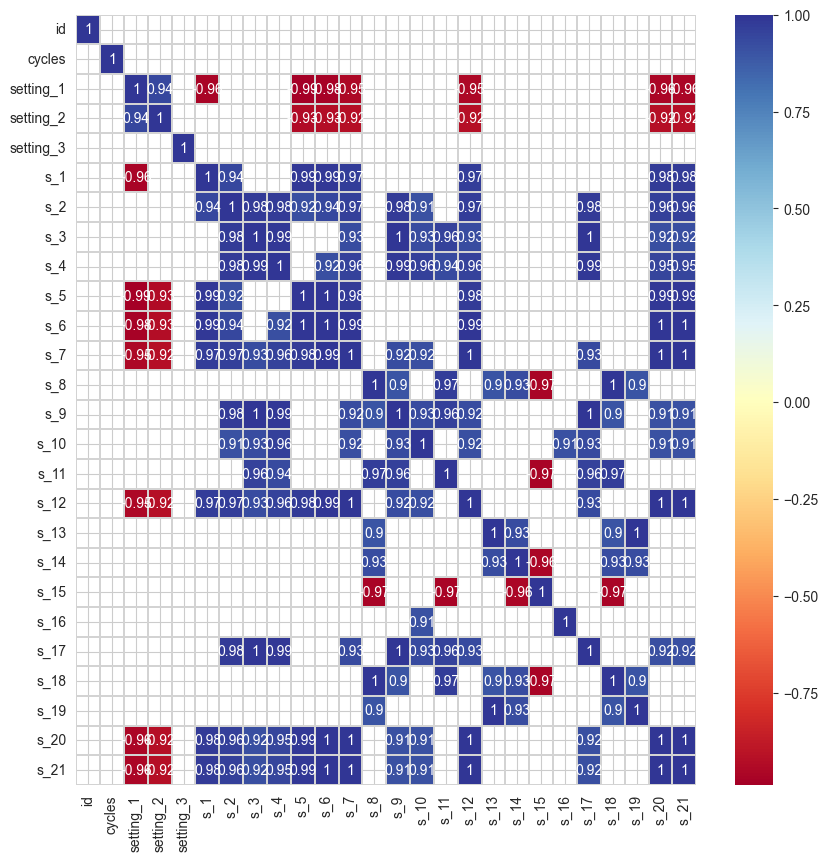

In [27]:
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

In [ ]:
sens_const_values = []
for feature in list(col_names):
    try:
        if df_train[feature].min()==df_train[feature].max():
            sens_const_values.append(feature)
    except:
        pass

print(sens_const_values)
df_train.drop(sens_const_values,axis=1,inplace=True)

In [28]:
cor_matrix = df_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(corr_features)
df_train.drop(corr_features,axis=1,inplace=True)
df_test.drop(corr_features,axis=1,inplace=True)

C:\Users\venablecrofta\AppData\Local\Temp\ipykernel_3156\3325546218.py:2: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations